## Extracion de datos de la API
  url :https://open-meteo.com/en/docs/historical-weather-api#hourly=temperature_2m,weather_code   

  Cordenadas 20.249181, -99.968143



  ### Importacion de librerias

In [7]:
import requests
import pandas as pd

 ### Definicion de los parametros

In [8]:
#Ubicacion : Aculco estado de mexico
LATITUDE = 20.249181
LONGITUDE = -99.968143
TIMEZONE = "America/Mexico_City"

#Periodo :Mayo de 2015 a 2024
YEARS = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
MONTH = "05" #Mayo

#Lista de parametros por hora a solicitar (separados por coma)
hourly_params = "temperature_2m,relative_humidity_2m,rain,vapour_pressure_deficit,wind_speed_10m,soil_temperature_0_to_7cm,is_day,shortwave_radiation"

### Funcion que  pedira los datos para el mes de cada año

In [9]:
def optener_datos_clima_API(year,month):
  url=f'https://archive-api.open-meteo.com/v1/archive?latitude={LATITUDE}&longitude={LONGITUDE}&start_date={year}-{month}-01&end_date={year}-{month}-30&timezone={TIMEZONE}&hourly={hourly_params}'
  response =requests.get(url)
  data = response.json()
  return data

### ejecutamos la funcion para cada año

In [10]:
#Lista para almacenar DataFrame de cada año
dataframes  =[]
for year in YEARS:
  data = optener_datos_clima_API(year,MONTH)

  #convertimos la hourly a un dataFrame
  df_year = pd.DataFrame(data["hourly"])
  #convertir la columna time a datetime
  df_year["time"] =pd.to_datetime(df_year["time"])

  #Extraer el año, mes , dia correctamente de la columna time
  df_year["year"] = df_year["time"].dt.year
  df_year["month"] = df_year["time"].dt.month
  df_year["day"] = df_year['time'].dt.day
  df_year["hour"] = df_year['time'].dt.hour
  #agregar el dataFrame a la lista
  dataframes.append(df_year)
  print(f'Datos ontenidos para el año {year}.')

Datos ontenidos para el año 2015.
Datos ontenidos para el año 2016.
Datos ontenidos para el año 2017.
Datos ontenidos para el año 2018.
Datos ontenidos para el año 2019.
Datos ontenidos para el año 2020.
Datos ontenidos para el año 2021.
Datos ontenidos para el año 2022.
Datos ontenidos para el año 2023.
Datos ontenidos para el año 2024.


In [11]:
 #Unir los  datos en un solo dataFrame
 df_clima = pd.concat(dataframes,ignore_index=True)

 #Visualizar los primeros registros
 df_clima.head()

,time,temperature_2m,relative_humidity_2m,rain,vapour_pressure_deficit,wind_speed_10m,soil_temperature_0_to_7cm,is_day,shortwave_radiation,year,month,day,hour
0,2015-05-01 00:00:00,12.8,90,0.0,0.14,6.6,16.0,0,0.0,2015,5,1,0
1,2015-05-01 01:00:00,11.9,91,0.0,0.13,6.6,15.5,0,0.0,2015,5,1,1
2,2015-05-01 02:00:00,11.5,90,0.0,0.13,5.3,14.9,0,0.0,2015,5,1,2
3,2015-05-01 03:00:00,12.2,86,0.0,0.19,4.8,14.8,0,0.0,2015,5,1,3
4,2015-05-01 04:00:00,12.7,84,0.0,0.23,4.1,14.9,0,0.0,2015,5,1,4


## Extracion de los datos procesados desde GitHub

In [12]:
url = "https://raw.githubusercontent.com/ferrerbr/Proyecto-API-clima/refs/heads/main/api-clima-procesado.csv"
df_clima_procesado = pd.read_csv(url)
df_clima_procesado.head()

,temperatura,humedad_relativa,precipitacion,deficit_presion_vapor,velocidad_viento,temperatura_suelo,es_dia,radiacion,year,month,day,hour,id
0,12.8,90,0.0,0.14,6.6,16.0,0,0.0,2015,5,1,0,a5e19e8c-2469-4320-8c0d-b1cf93434b57
1,11.9,91,0.0,0.13,6.6,15.5,0,0.0,2015,5,1,1,3436f606-7f5b-4be1-bea1-019900befe67
2,11.5,90,0.0,0.13,5.3,14.9,0,0.0,2015,5,1,2,1e8495db-f234-4ea5-ab43-6388b9e70a3c
3,12.2,86,0.0,0.19,4.8,14.8,0,0.0,2015,5,1,3,39315ab7-63df-436f-8b46-93e1dc93a717
4,12.7,84,0.0,0.23,4.1,14.9,0,0.0,2015,5,1,4,e310f6ab-aba1-4e90-a23c-ca8fe72d8744


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
#numero de registros duplicados
num_duplicados = df_clima_procesado.duplicated().sum()
print(f'Numero de registros duplicados: {num_duplicados}')

Numero de registros duplicados: 0


In [15]:
# informacion del conunto de datos
df_clima_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperatura            7200 non-null   float64
 1   humedad_relativa       7200 non-null   int64  
 2   precipitacion          7200 non-null   float64
 3   deficit_presion_vapor  7200 non-null   float64
 4   velocidad_viento       7200 non-null   float64
 5   temperatura_suelo      7200 non-null   float64
 6   es_dia                 7200 non-null   int64  
 7   radiacion              7200 non-null   float64
 8   year                   7200 non-null   int64  
 9   month                  7200 non-null   int64  
 10  day                    7200 non-null   int64  
 11  hour                   7200 non-null   int64  
 12  id                     7200 non-null   object 
dtypes: float64(6), int64(6), object(1)
memory usage: 731.4+ KB


## Selecionamos la variable objetivo y creamos la columna categorica


In [16]:
# Creamos la columna llovio para indica si ese dia hubo lluvia o no
df_clima_procesado['llovio'] = df_clima_procesado['precipitacion'].apply(lambda x: 'Si' if x > 0 else 'No')
df_clima_procesado.head()

,temperatura,humedad_relativa,precipitacion,deficit_presion_vapor,velocidad_viento,temperatura_suelo,es_dia,radiacion,year,month,day,hour,id,llovio
0,12.8,90,0.0,0.14,6.6,16.0,0,0.0,2015,5,1,0,a5e19e8c-2469-4320-8c0d-b1cf93434b57,No
1,11.9,91,0.0,0.13,6.6,15.5,0,0.0,2015,5,1,1,3436f606-7f5b-4be1-bea1-019900befe67,No
2,11.5,90,0.0,0.13,5.3,14.9,0,0.0,2015,5,1,2,1e8495db-f234-4ea5-ab43-6388b9e70a3c,No
3,12.2,86,0.0,0.19,4.8,14.8,0,0.0,2015,5,1,3,39315ab7-63df-436f-8b46-93e1dc93a717,No
4,12.7,84,0.0,0.23,4.1,14.9,0,0.0,2015,5,1,4,e310f6ab-aba1-4e90-a23c-ca8fe72d8744,No


In [17]:
df_clima_procesado.describe()

,temperatura,humedad_relativa,precipitacion,deficit_presion_vapor,velocidad_viento,temperatura_suelo,es_dia,radiacion,year,month,day,hour
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.0,7200.000000,7200.000000
mean,19.783472,50.413889,0.072625,1.384176,11.253764,24.461681,0.548194,298.507778,2019.500000,5.0,15.500000,11.500000
std,5.395312,25.606142,0.398503,1.067700,6.097714,6.542566,0.497706,366.891597,2.872481,0.0,8.656043,6.922667
min,8.100000,6.000000,0.000000,0.000000,0.400000,12.600000,0.000000,0.000000,2015.000000,5.0,1.000000,0.000000
25%,15.200000,28.000000,0.000000,0.480000,6.400000,19.100000,0.000000,0.000000,2017.000000,5.0,8.000000,5.750000
50%,19.000000,48.000000,0.000000,1.110000,10.100000,23.200000,1.000000,55.000000,2019.500000,5.0,15.500000,11.500000
75%,24.100000,73.000000,0.000000,2.130000,15.000000,29.100000,1.000000,648.000000,2022.000000,5.0,23.000000,17.250000
max,34.200000,100.000000,7.100000,4.780000,33.700000,44.200000,1.000000,1092.000000,2024.000000,5.0,30.000000,23.000000


In [18]:
numerical_columns = ["temperatura", "humedad_relativa", "precipitacion","deficit_presion_vapor", "velocidad_viento", "temperatura_suelo", "radiacion"]

## Analisis explotatorio de los datos

In [19]:
#cuantos dias en el mes de mayo llovio cada año
dias_lluvia_year = (df_clima_procesado[df_clima_procesado["llovio"] == "Si"].drop_duplicates(subset=["year","month","day"]).groupby("year")["day"].count())
print(dias_lluvia_year)

year
2015    27
2016    18
2017    21
2018    17
2019    11
2020    14
2021    16
2022     6
2023    21
2024     7
Name: day, dtype: int64


###Histogramas
representacion de frecuencia historica

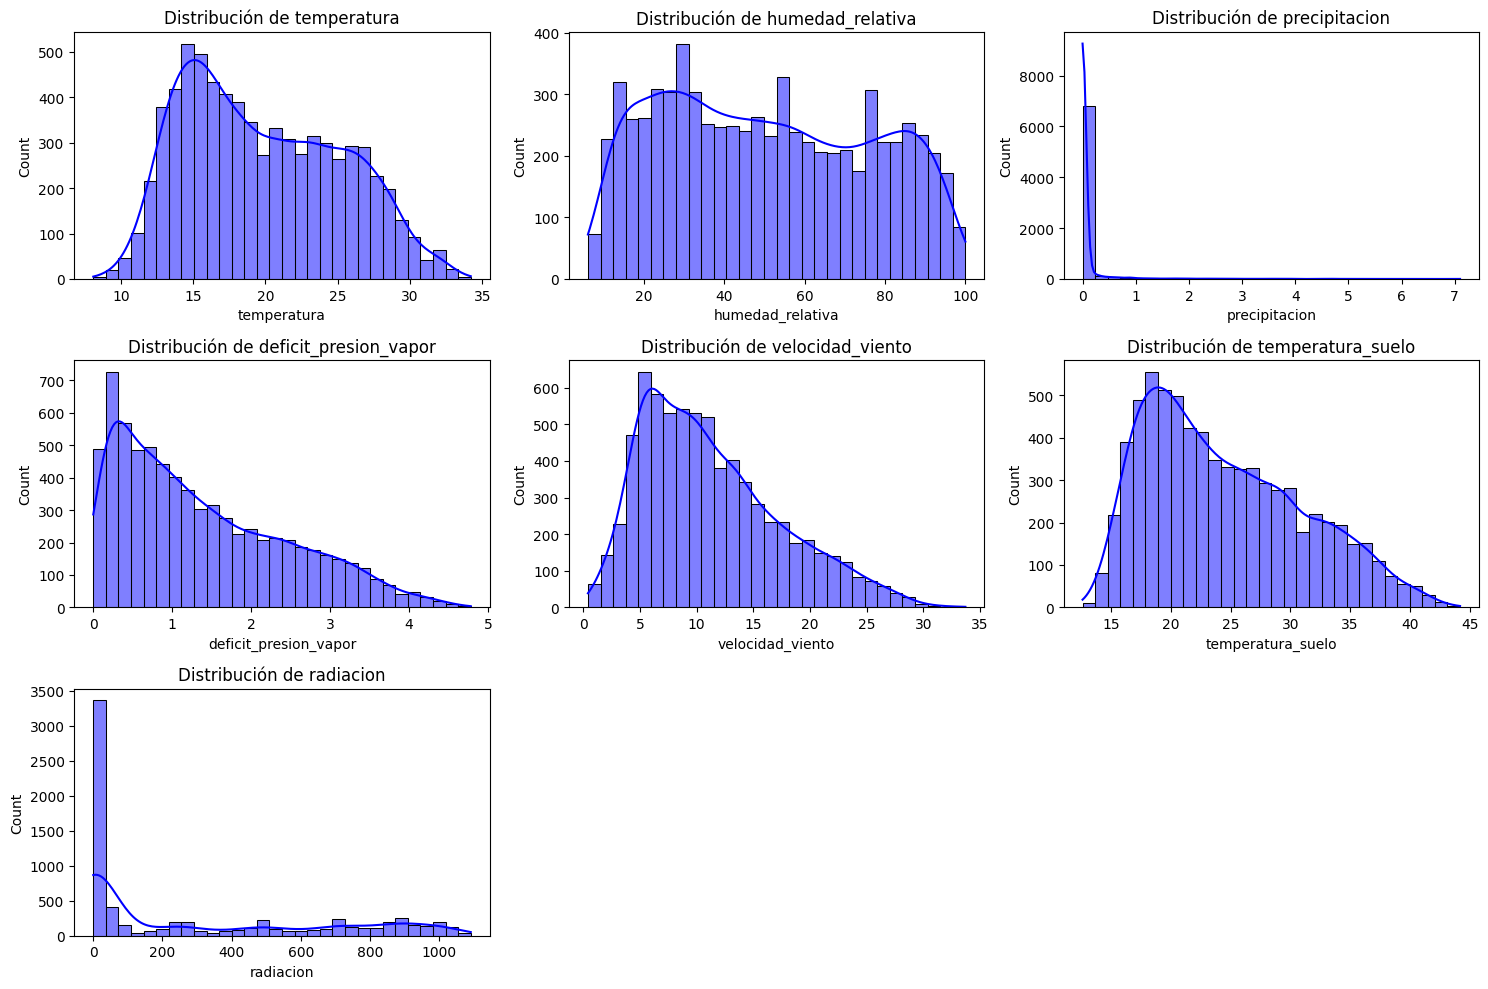

In [20]:
# Configuran el tamaño del gráfico
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_clima_procesado[col].dropna(), kde=True, bins=30, color="blue")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


###Graficos de dispersiones para ver las relaciones

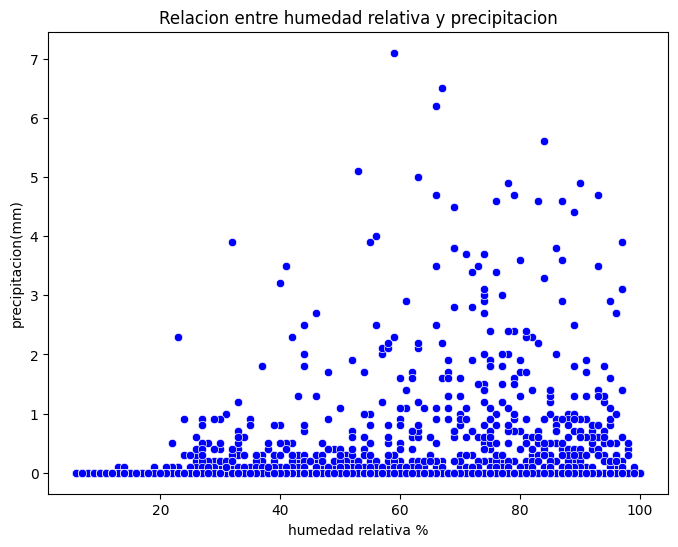

In [21]:
#lluvia vs humeda relativa
plt.figure(figsize=(8,6) )#definimos
sns.scatterplot(data = df_clima_procesado, x = "humedad_relativa", y = "precipitacion",color = "blue")
plt.title("Relacion entre humedad relativa y precipitacion")
plt.xlabel("humedad relativa %")
plt.ylabel("precipitacion(mm)")
plt.show()


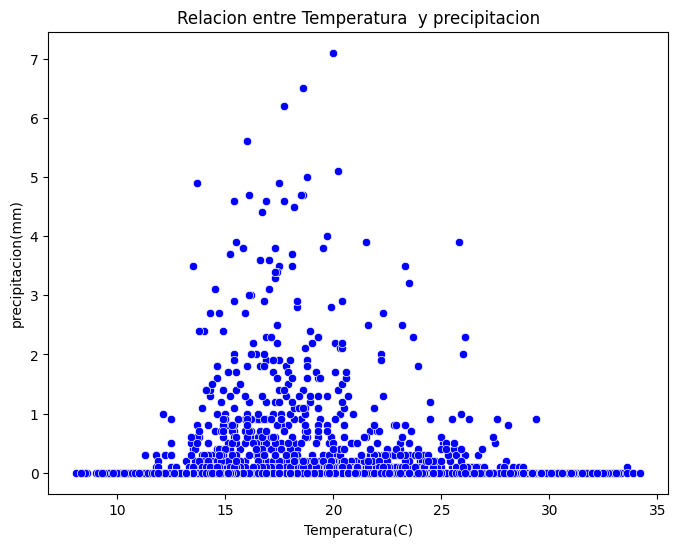

In [22]:
#temperatura vs vs precipitacion
plt.figure(figsize=(8,6) )#definimos
sns.scatterplot(data = df_clima_procesado, x = "temperatura", y = "precipitacion",color = "blue")
plt.title("Relacion entre Temperatura  y precipitacion")
plt.xlabel("Temperatura(C)")
plt.ylabel("precipitacion(mm)")
plt.show()

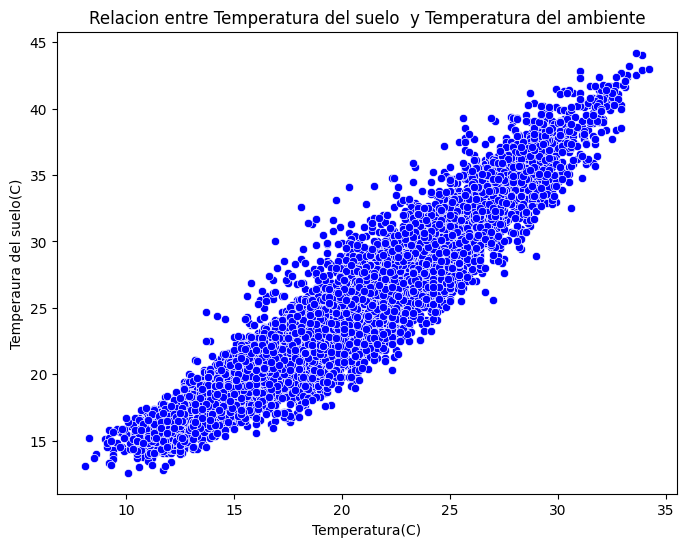

In [23]:
#temperartura del suelo vs temperatura
plt.figure(figsize=(8,6) )#definimos
sns.scatterplot(data = df_clima_procesado, x = "temperatura", y = "temperatura_suelo",color = "blue")
plt.title("Relacion entre Temperatura del suelo  y Temperatura del ambiente")
plt.xlabel("Temperatura(C)")
plt.ylabel("Temperaura del suelo(C)")
plt.show()

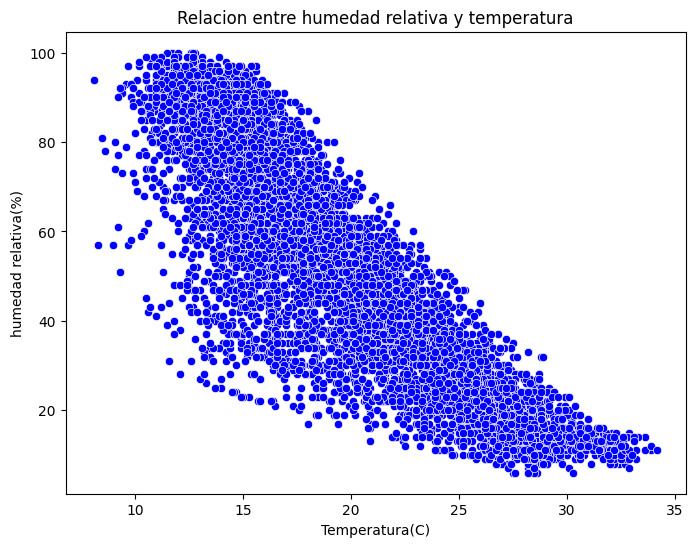

In [24]:
#humedad relativa vs temperatura
plt.figure(figsize=(8,6) )#definimos
sns.scatterplot(data = df_clima_procesado, x = "temperatura", y = "humedad_relativa",color = "blue")
plt.title("Relacion entre humedad relativa y temperatura")
plt.xlabel("Temperatura(C)")
plt.ylabel("humedad relativa(%)")
plt.show()

###Graficos de cajas

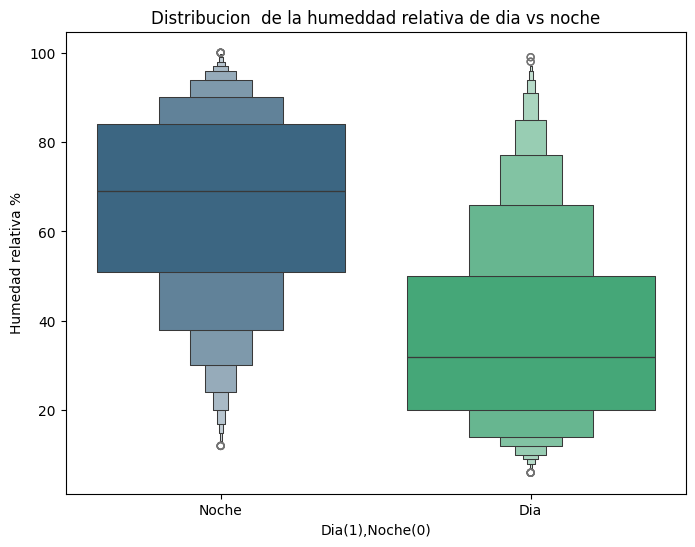

In [26]:
# como estuvo la precipitacion si era de noche o de dia
plt.figure(figsize=(8,6,))
sns.boxenplot(x = df_clima_procesado["es_dia"],y = df_clima_procesado["humedad_relativa"],hue = df_clima_procesado["es_dia"], palette="viridis", legend=False)
plt.title("Distribucion  de la humeddad relativa de dia vs noche")
plt.xlabel("Dia(1),Noche(0)")
plt.ylabel("Humedad relativa %")
plt.xticks([0,1],["Noche","Dia"])
plt.show()

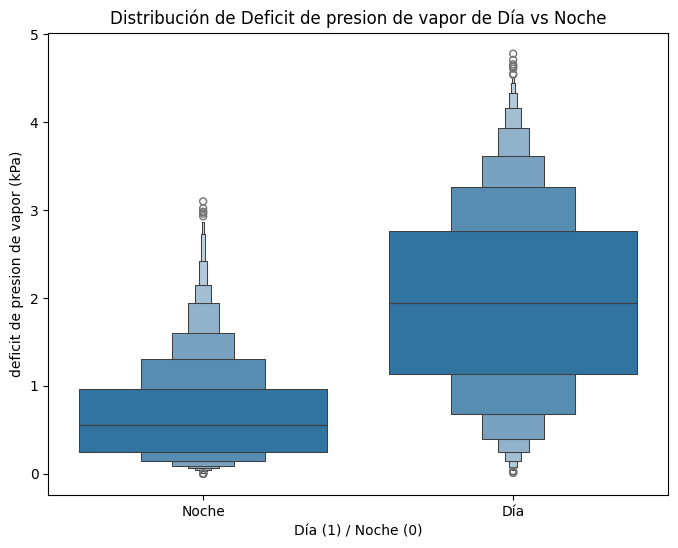

In [27]:
#como estuvo el deficit de presion de vapor si era de noche o de dia
plt.figure(figsize=(8, 6))
sns.boxenplot(x=df_clima_procesado["es_dia"], y=df_clima_procesado["deficit_presion_vapor"], )
plt.title("Distribución de Deficit de presion de vapor de Día vs Noche")
plt.xlabel("Día (1) / Noche (0)")
plt.ylabel("deficit de presion de vapor (kPa)")
plt.xticks([0, 1], ["Noche", "Día"])
plt.show()

###Graficos de tendencias

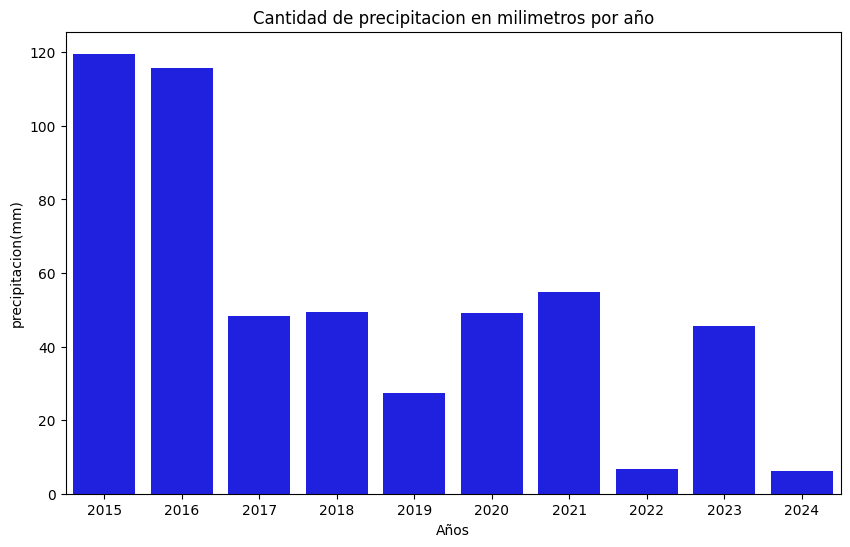

In [28]:
# precipitacion (mm)  por año en el mes de mayo
precipitacion_por_ano = df_clima_procesado.groupby('year')['precipitacion'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=precipitacion_por_ano, x='year', y='precipitacion', color='blue' )

plt.title("Cantidad de precipitacion en milimetros por año")
plt.xlabel("Años")
plt.ylabel("precipitacion(mm)")
plt.xticks([0,1,2,3,4,5,6,7,8,9],["2015","2016","2017","2018","2019","2020","2021","2022","2023","2024"])
plt.show()


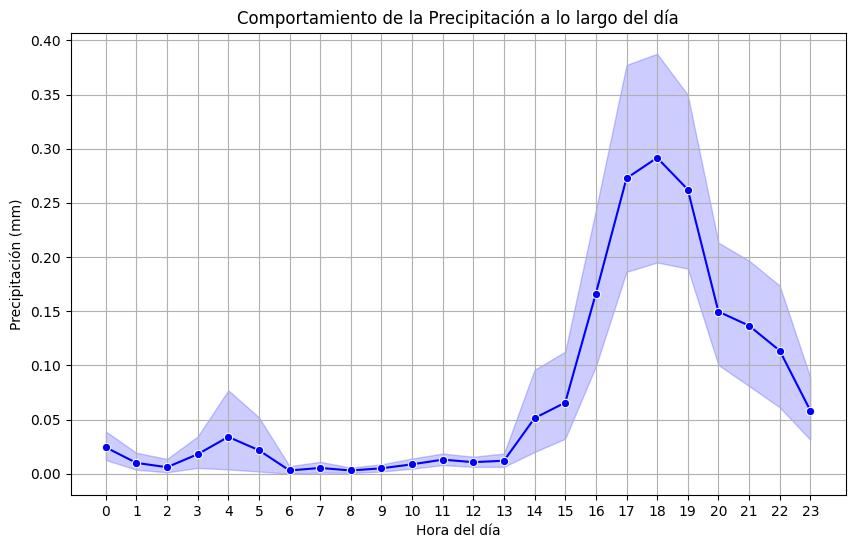

In [29]:
#comportamiento de la precipitacion a lo largo del dia
plt.figure(figsize=(10,6))
sns.lineplot(data=df_clima_procesado, x='hour', y='precipitacion', marker='o', color='blue')
plt.title("Comportamiento de la Precipitación a lo largo del día")
plt.xlabel("Hora del día")
plt.ylabel("Precipitación (mm)")
horas = list(range(0,24))
plt.xticks(horas,horas)
plt.grid(True)
plt.show()


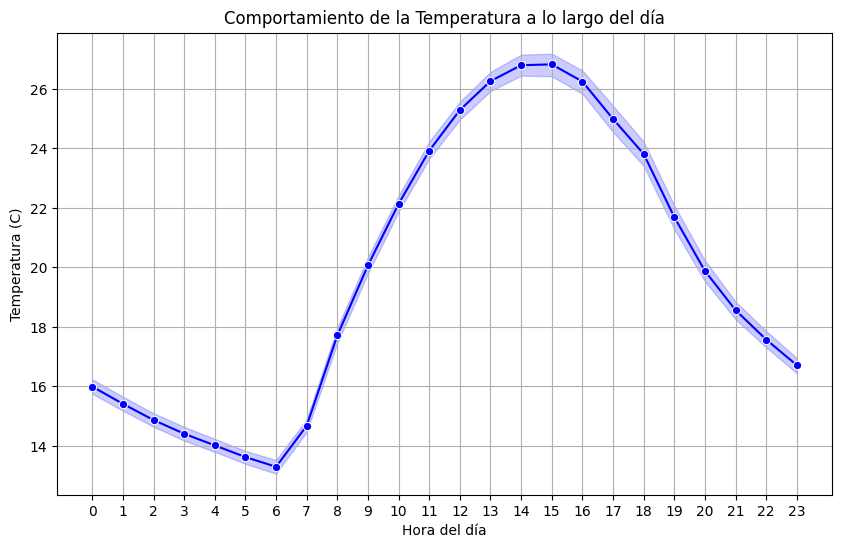

In [30]:
#comportamiento de la Temperatura a lo largo del dia
plt.figure(figsize=(10,6))
sns.lineplot(data=df_clima_procesado, x='hour', y='temperatura', marker='o', color='blue')
plt.title("Comportamiento de la Temperatura a lo largo del día")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura (C)")
horas = list(range(0,24))
plt.xticks(horas,horas)
plt.grid(True)
plt.show()

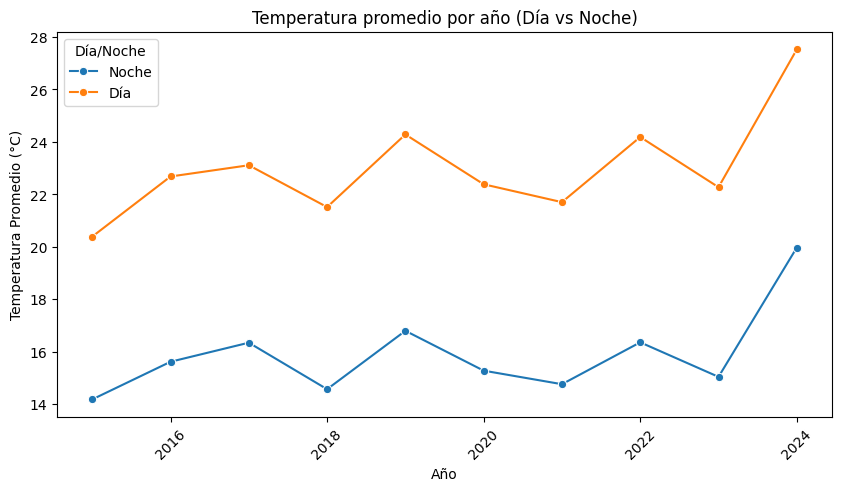

In [31]:

# Convertir la columna 'es_dia' a string para agrupar correctamente
df_clima_procesado["es_dia"] = df_clima_procesado["es_dia"].astype(str)

# Agrupación por año y 'es_dia', y cálculo de la temperatura promedio
mean_temp = df_clima_procesado.groupby(['year', "es_dia"]).agg({'temperatura': 'mean'}).reset_index()

# Crear la figura final
plt.figure(figsize=(10, 5))
sns.lineplot(data=mean_temp, x="year", y="temperatura", hue="es_dia", marker="o")
plt.title("Temperatura promedio por año (Día vs Noche)")
plt.xlabel("Año")
plt.ylabel("Temperatura Promedio (°C)")
plt.xticks(rotation=45)

# Personalizar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Noche", "Día"], title="Día/Noche")

# Mostrar el gráfico
plt.show()

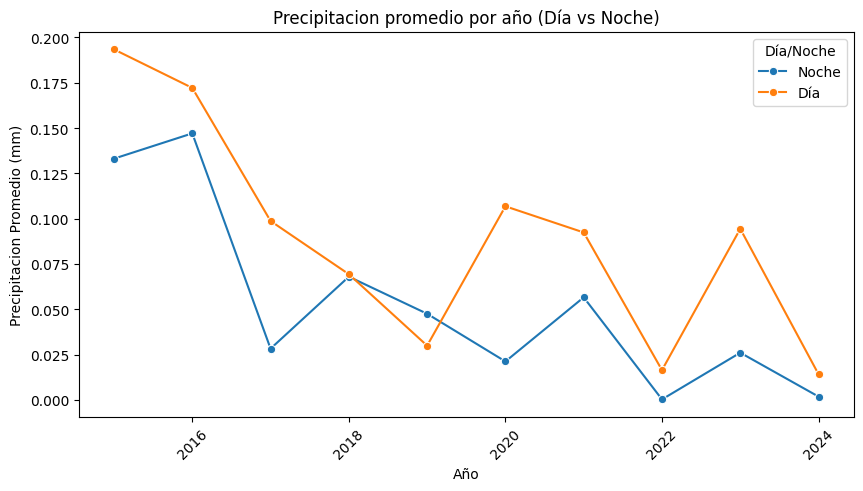

In [32]:

# Convertir la columna 'es_dia' a string para agrupar correctamente
df_clima_procesado["es_dia"] = df_clima_procesado["es_dia"].astype(str)

# Agrupación por año y 'es_dia', y cálculo de la precipitacion promedio
mean_temp = df_clima_procesado.groupby(['year', "es_dia"]).agg({'precipitacion': 'mean'}).reset_index()

# Crear la figura final
plt.figure(figsize=(10, 5))
sns.lineplot(data=mean_temp, x="year", y="precipitacion", hue="es_dia", marker="o")
plt.title("Precipitacion promedio por año (Día vs Noche)")
plt.xlabel("Año")
plt.ylabel("Precipitacion Promedio (mm)")
plt.xticks(rotation=45)

# Personalizar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Noche", "Día"], title="Día/Noche")

# Mostrar el gráfico
plt.show()

In [33]:
#Seleccionar columnas numericas
df_numericas = df_clima_procesado.select_dtypes(include=["number"]).drop(columns=["year","month","day","hour", "es_dia","id"],errors = "ignore")
df_numericas.head()


,temperatura,humedad_relativa,precipitacion,deficit_presion_vapor,velocidad_viento,temperatura_suelo,radiacion
0,12.8,90,0.0,0.14,6.6,16.0,0.0
1,11.9,91,0.0,0.13,6.6,15.5,0.0
2,11.5,90,0.0,0.13,5.3,14.9,0.0
3,12.2,86,0.0,0.19,4.8,14.8,0.0
4,12.7,84,0.0,0.23,4.1,14.9,0.0


###Matixz de correlacion

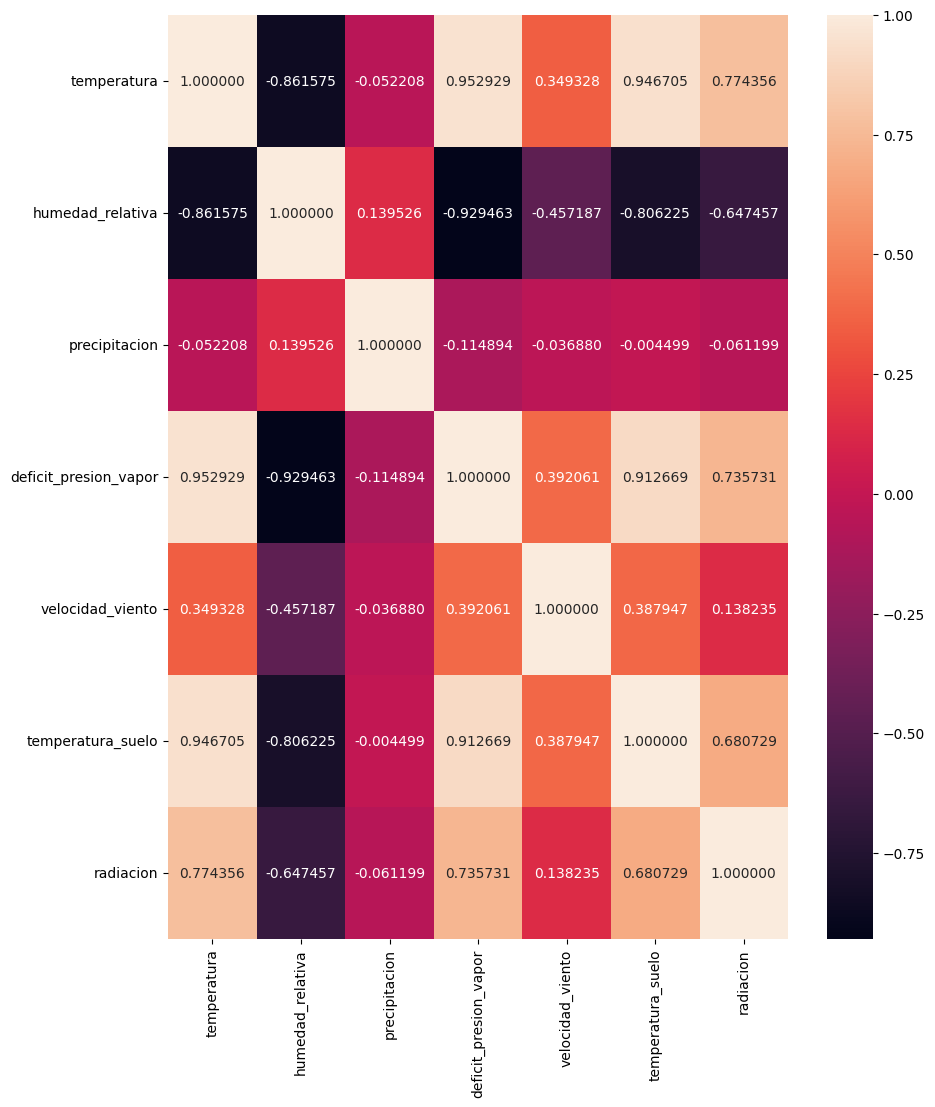

In [34]:
#Matriz de correlacion
plt.figure(figsize=(10,12))
sns.heatmap(df_numericas.corr(),annot=True, fmt="2f")
plt.show()

In [35]:
#Gurdar el DataFrame ue contiene los datos en un archivo csv
df_clima_procesado.to_csv("Datos_Aculco_2015_2024.csv",index=False)
print("Archivo CSV 'Datos_Aculco_2015_2024.csv' guardado exitosamente")

Archivo CSV 'Datos_Aculco_2015_2024.csv' guardado exitosamente


## Normalizacion de variables

In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [37]:
#Crearuna copo del DataFrame para el escaldo
df_clima_escaled = df_clima_procesado.copy()


In [38]:
#Aplicar un escalado de las columnas numericas
#MinMax hace un escalado de valores por defecto entre cero y uno
scaler = MinMaxScaler()
df_clima_escaled[numerical_columns] = scaler.fit_transform(df_clima_escaled[numerical_columns])

#Mostar una vista previa del DaraFrame escalado
df_clima_escaled.describe()

,temperatura,humedad_relativa,precipitacion,deficit_presion_vapor,velocidad_viento,temperatura_suelo,radiacion,year,month,day,hour
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.0,7200.000000,7200.000000
mean,0.447643,0.472488,0.010229,0.289577,0.325939,0.375370,0.273359,2019.500000,5.0,15.500000,11.500000
std,0.206717,0.272406,0.056127,0.223368,0.183115,0.207043,0.335981,2.872481,0.0,8.656043,6.922667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,5.0,1.000000,0.000000
25%,0.272031,0.234043,0.000000,0.100418,0.180180,0.205696,0.000000,2017.000000,5.0,8.000000,5.750000
50%,0.417625,0.446809,0.000000,0.232218,0.291291,0.335443,0.050366,2019.500000,5.0,15.500000,11.500000
75%,0.613027,0.712766,0.000000,0.445607,0.438438,0.522152,0.593407,2022.000000,5.0,23.000000,17.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,5.0,30.000000,23.000000


## Selecccion de variables

In [39]:
#Definir las variables predictoras y la variable objetivo (variable a predecir)
predictoras =["precipitacion","humedad_relativa","velocidad_viento","es_dia","hour","radiacion","deficit_presion_vapor"]
objetivo = "temperatura"

# Variables predictoras(X) y variable objetivo (Y)
x = df_clima_escaled[predictoras]
y = df_clima_escaled[objetivo]


In [40]:
from sklearn.feature_selection import SelectKBest, f_regression

In [41]:
#Mejores K variables
#definir el numero de caracteristicas que queremos retener
k = 3 # por ejemplo seleccionamos las 3 caracteristicas mas relevantes

#Crear el selector se caracteristicas usando f_regresion
selector =SelectKBest(score_func=f_regression,k=k)
#ajustar el selector de los datos
X_new = selector.fit_transform(x,y)

#Obtener los nombres de las caracteriscas seleccionadas
selected_features = x.columns[selector.get_support()]
print("caracteristicas_seleccionadas por SelectKBest:")
print(selected_features.tolist())

caracteristicas_seleccionadas por SelectKBest:
['humedad_relativa', 'radiacion', 'deficit_presion_vapor']


##Escalado de las variables

In [42]:
df_clima_escaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperatura            7200 non-null   float64
 1   humedad_relativa       7200 non-null   float64
 2   precipitacion          7200 non-null   float64
 3   deficit_presion_vapor  7200 non-null   float64
 4   velocidad_viento       7200 non-null   float64
 5   temperatura_suelo      7200 non-null   float64
 6   es_dia                 7200 non-null   object 
 7   radiacion              7200 non-null   float64
 8   year                   7200 non-null   int64  
 9   month                  7200 non-null   int64  
 10  day                    7200 non-null   int64  
 11  hour                   7200 non-null   int64  
 12  id                     7200 non-null   object 
 13  llovio                 7200 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 787.6+ 

In [43]:
#creamos copia del dataFrame escalado
df_clima_select = df_clima_escaled.copy()

# se eliminan columnas que no aportaron informacion o son irrelevantes para la prediccion
df_clima_select = df_clima_select.drop(columns = ["precipitacion","velocidad_viento","temperatura_suelo","es_dia","year","month","day","hour","id","llovio"])

In [44]:
df_clima_select.head()

,temperatura,humedad_relativa,deficit_presion_vapor,radiacion
0,0.180077,0.893617,0.029289,0.0
1,0.145594,0.904255,0.027197,0.0
2,0.130268,0.893617,0.027197,0.0
3,0.157088,0.851064,0.039749,0.0
4,0.176245,0.829787,0.048117,0.0


## Pruebas con modelos de  aprendizaje

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [46]:
columnas_numericas = [ "humedad_relativa", "precipitacion","deficit_presion_vapor", "velocidad_viento", "temperatura_suelo", "radiacion"]
df_escalado = df_clima_procesado.copy()
scaler = MinMaxScaler()
df_escalado[columnas_numericas] = scaler.fit_transform(df_escalado[columnas_numericas])
df_escalado.head()



,temperatura,humedad_relativa,precipitacion,deficit_presion_vapor,velocidad_viento,temperatura_suelo,es_dia,radiacion,year,month,day,hour,id,llovio
0,12.8,0.893617,0.0,0.029289,0.186186,0.107595,0,0.0,2015,5,1,0,a5e19e8c-2469-4320-8c0d-b1cf93434b57,No
1,11.9,0.904255,0.0,0.027197,0.186186,0.091772,0,0.0,2015,5,1,1,3436f606-7f5b-4be1-bea1-019900befe67,No
2,11.5,0.893617,0.0,0.027197,0.147147,0.072785,0,0.0,2015,5,1,2,1e8495db-f234-4ea5-ab43-6388b9e70a3c,No
3,12.2,0.851064,0.0,0.039749,0.132132,0.069620,0,0.0,2015,5,1,3,39315ab7-63df-436f-8b46-93e1dc93a717,No
4,12.7,0.829787,0.0,0.048117,0.111111,0.072785,0,0.0,2015,5,1,4,e310f6ab-aba1-4e90-a23c-ca8fe72d8744,No


In [47]:
df_escalado["temperatura_calss"] = df_escalado["temperatura"].round().astype(int)
df_escalado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperatura            7200 non-null   float64
 1   humedad_relativa       7200 non-null   float64
 2   precipitacion          7200 non-null   float64
 3   deficit_presion_vapor  7200 non-null   float64
 4   velocidad_viento       7200 non-null   float64
 5   temperatura_suelo      7200 non-null   float64
 6   es_dia                 7200 non-null   object 
 7   radiacion              7200 non-null   float64
 8   year                   7200 non-null   int64  
 9   month                  7200 non-null   int64  
 10  day                    7200 non-null   int64  
 11  hour                   7200 non-null   int64  
 12  id                     7200 non-null   object 
 13  llovio                 7200 non-null   object 
 14  temperatura_calss      7200 non-null   int64  
dtypes: f

### RandomForest

In [48]:
# definir las variables predictoras y la variable objetivo
predictoras = ['humedad_relativa', 'radiacion', 'deficit_presion_vapor']
objetivo = 'temperatura_calss'

# variables predictoras (X) y variable objetivo (Y)
x = df_escalado[predictoras]
y = df_escalado[objetivo]

In [49]:
# dividir los datos  en conjuntos de entrnamiento  y prueba(80% train 20% test)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
#Entrenar el modelo  RandomForest
rf_model = RandomForestClassifier(n_estimators=300,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [51]:
#Realizar predicciones y evaluar el modelo RandomForest
y_pred_rf = rf_model.predict(x_test)

In [52]:
#Calculo  de las metricas para random Forest
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=True)
recall = recall_score(y_test, y_pred_rf, average='macro',zero_division=True)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=True)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.6902777777777778
Precision: 0.6785746542809208
Recall: 0.6377357900079473
F1-Score: 0.5990603467484997


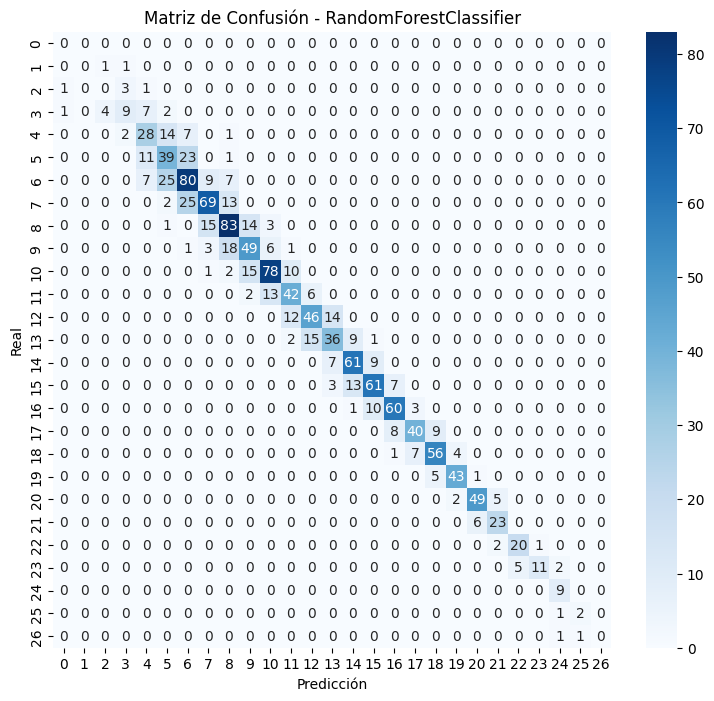

In [53]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(9,8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - RandomForestClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

###Regresion Logisitca

In [54]:
#Regresion logistica
from sklearn.linear_model import LogisticRegression

In [55]:
# definir las variables predictoras y la variable objetivo
predictoras2 = ['humedad_relativa', 'radiacion', 'deficit_presion_vapor']
objetivo2 = 'temperatura_calss'

In [56]:
# variables predictoras (X) y variable objetivo (Y)
x2 = df_escalado[predictoras2]
y2 = df_escalado[objetivo2]

In [57]:
# dividir los datos  en conjuntos de entrnamiento  y prueba(80% train 20% test)
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=42)

In [58]:
modelo_regresion = LogisticRegression(solver='lbfgs',max_iter=1000, random_state=42)
#entrenar el modelo
modelo_regresion.fit(x_train2, y_train2)

#realizar las predicciones
y_prediction = modelo_regresion.predict(x_test2)

In [59]:
# calculo de   las metricas
accuracy2 =accuracy_score(y_test2, y_prediction)
precision2 = precision_score(y_test2, y_prediction, average='macro', zero_division=True)
recall2 = recall_score(y_test2, y_prediction, average='macro',zero_division=True)
f12 = f1_score(y_test2, y_prediction, average='macro', zero_division=True)


print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1-Score: {f12}")

Accuracy: 0.24722222222222223
Precision: 0.6408240157071076
Recall: 0.16293457278127405
F1-Score: 0.1135499630898953


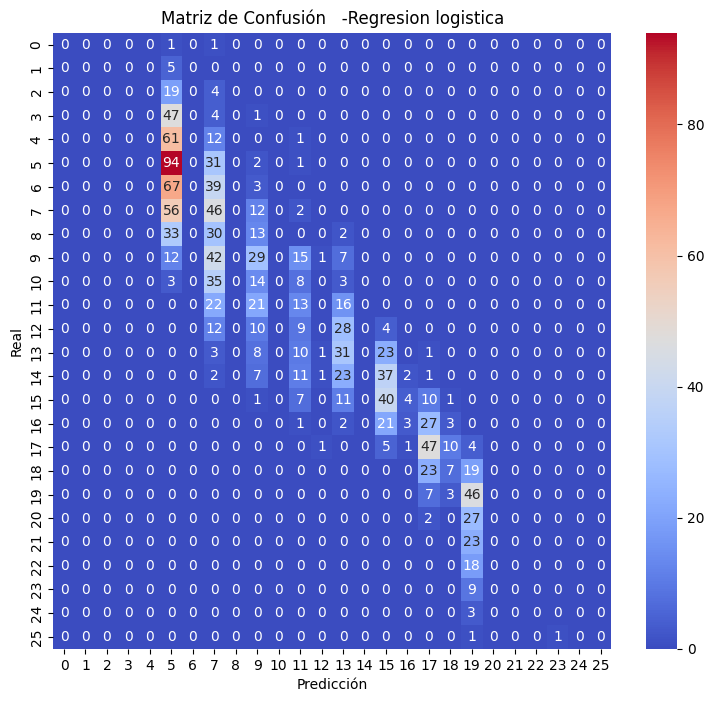

In [62]:
cm_rf_2 = confusion_matrix(y_test2,y_prediction)

# Graficar la matriz de confusión
plt.figure(figsize=(9,8))
sns.heatmap(cm_rf_2, annot=True, fmt='d', cmap='coolwarm')
plt.title("Matriz de Confusión   -Regresion logistica")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Resultados y Conclusiones

RandomForest , obtuvo metricas que no son completamente aceptables
Accuracy: 0.6902777777777778  
Precision: 0.6785746542809208  
Recall: 0.6377357900079473  
F1-Score: 0.5990603467484997  
 pero la matriz de confucion no parece " tan mal pues los resultado en general solo varian un grado y maximo se pueden desviar 2 grados  pero en muy pocas ocaciones , aun asi la cantidad de verdaderos positivos es alta en los erroneos  
   
     
---     




 Regresion Logistica, obtuvo metricas nada aceptables  
 Accuracy: 0.24722222222222223  
Precision: 0.6408240157071076  
Recall: 0.16293457278127405  
F1-Score: 0.1135499630898953  
 la matriz de confusion lo confirma  ya que podemos ver que  el modelo puede llegar a desviarse hasta 6-7 grados ,